In [1]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import joblib

In [2]:
df = sns.load_dataset('iris')

In [3]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [4]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [5]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
         ],
    remainder="passthrough"
)
pipe = Pipeline([("Preprocessing", preprocessor), ('Outlier', LocalOutlierFactor(n_neighbors=20, contamination=0.1))], verbose=True)

In [6]:
pipe.fit(df)

[Pipeline] ..... (step 1 of 2) Processing Preprocessing, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing Outlier, total=   0.0s


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['species'], dtype='object'))])),
                ('Outlier', LocalOutlierFactor(contamination=0.1))],
         verbose=True)

In [7]:
df_mod = pipe[:-1].transform(df)
df_mod_columns = pipe[:-1].get_feature_names_out()

In [8]:
df_mod = pd.DataFrame(df_mod, columns=df_mod_columns)
df_mod.head()

,num__sepal_length,num__sepal_width,num__petal_length,num__petal_width,cat__species_setosa,cat__species_versicolor,cat__species_virginica
0,-0.900681,1.019004,-1.340227,-1.315444,1.0,0.0,0.0
1,-1.143017,-0.131979,-1.340227,-1.315444,1.0,0.0,0.0
2,-1.385353,0.328414,-1.397064,-1.315444,1.0,0.0,0.0
3,-1.506521,0.098217,-1.283389,-1.315444,1.0,0.0,0.0
4,-1.021849,1.249201,-1.340227,-1.315444,1.0,0.0,0.0


<Axes: ylabel='Density'>

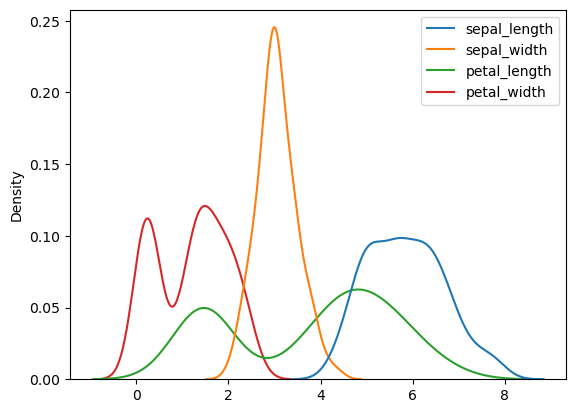

In [9]:
sns.kdeplot(df)

<Axes: ylabel='Density'>

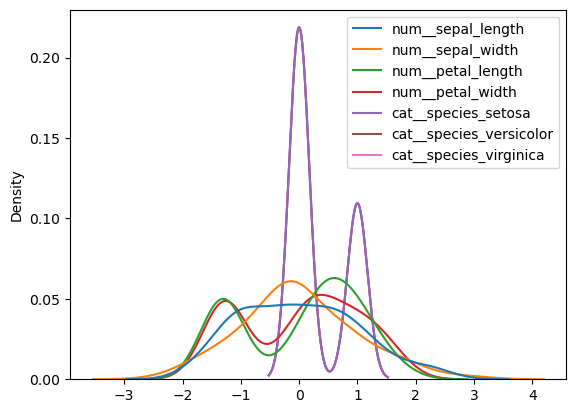

In [10]:
sns.kdeplot(df_mod)

In [11]:
joblib.dump(pipe, "pipeline.joblib")

['pipeline.joblib']